## PROYECTO DE ANALISIS DE ALGORITMOS. SEGUNDA ENTREGA


### Orlando Abaunza Ubaque
### Pablo Robayo

### 1. Cliques en Grafos

##### Primero se calcula la distancia de hamming, para despues mediante la funcion find_cliques(G) de la libreria "networkx" calcular el numero de cliques en el grafo de hamming H.


In [133]:
import networkx
import itertools
import logging
import time
import math
import numpy as np
import pylab as pl


def hamming(tam, d):
    H = networkx.Graph()
    l = ["01"] * tam 
    nodes = itertools.product(*l)
    nodes = [''.join(x) for x in nodes]
    H.add_nodes_from(nodes) 
    
    for node in H.nodes():        
        for v in H.nodes():
            if(v != node):
                dist = h_distance(node, v)
                if(dist >= d):
                    H.add_edge(node,v)
    
    return H

def h_distance(str1, str2):        
        distance = 0
        for ch1, ch2 in zip(str1, str2):
                if ch1 != ch2:
                        distance += 1
        return distance
    
def mutate_node(node, n):
    if node[n] == '0':
        base = '1'
    else:
        base = '0'
    new_node = node[0:n] + base + node[n+1:]
    return new_node


H = hamming(3,1)

print ("Cliques: ",list(networkx.find_cliques(H))) 
print ("# de Cliques: " ,networkx.graph_clique_number(H))

Cliques:  [['011', '100', '101', '001', '110', '000', '111', '010']]
# de Cliques:  8


#### Analisis 

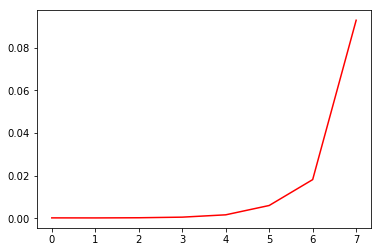

In [78]:
def exper_analys(A):
    R = []
    for i in range(N):
        tic = time.clock()
        H = hamming(i,10)
        networkx.graph_clique_number(H)
        toc = time.clock()
        R.append(toc - tic)
    return R

N = 8
pl.clf()
x = np.arange(N)
y = np.array(exper_analys(N))
pl.plot(x, y, '-r')
pl.show()

### 2. MST Arbol de minima expansión
##### Primero ordenamos las aristas del grafo de forma ascendente. A partir de la lista de dichas aristas crearemos el arbol de minima expansión (MST)
##### Tiene un tiempo de ejecucion asintotico del orden O(2nm^2)

In [112]:
def open_file(fileName):
    lines = [line.rstrip('\n') for line in open(fileName)]
    N = int(lines[0])
    K = int(lines[1])
    L = []
    
    i = 0
    for l in lines[2:]:
        t = l.split(',',N - i)
        i -= 1
        q = (i * -1) - 1
        for j in t:
            if(j != "Inf"):
                tokens = j.split('/',1)
                u = ((i * -1) - 1)
                L.append((u,q, int(tokens[0]) , tokens[1]))
            q+=1
    return N, K, L

In [113]:
class arista:
    def __init__(self,origen,destino,color,peso):
        self.origen=origen
        self.destino=destino
        self.color=color
        self.peso=peso
        
def ordenamiento(l):
    for c in range(1,len(l)):
        for x in range(len(l)-1):
            if l[x].peso>l[x+1].peso:
                aux=l[x]
                l[x]=l[x+1]
                l[x+1]=aux

        
def listarAristas(graph):
    lista=[]
    repetido=[]
    for u in graph:
        origen=u
        for v in graph[u]:
            destino=v
            for x in graph[u][v]:
                if(x=='R' or x=='B'):
                    color=x
                else:
                    peso=x
            if(not destino in repetido):        
                a=arista(origen,destino,color,peso)
                lista.append(a)
        repetido.append(origen)
    ordenamiento(lista)
    return lista

In [135]:
def armarArbol(lista,k,n):
    azules=k
    rojas=n-k-1
    cblue=0
    cred=0
    resp=[]
    valor=0
    print("K:",k)
    print("n-k-1:",rojas)
    for i in lista:
        introducir=False
        if(i.color=='R'):
            if(cred<rojas):
                introducir=True
                cred=cred+1
        elif(i.color=='B'):
            if(cblue<azules):
                introducir=True
                cblue=cblue+1
        if(introducir):
            arbol={i.origen:{i.destino: i.color}}
            resp.append(arbol)
            valor=valor+i.peso
    print("Peso: ",valor)
    print("Aristas Azules: ",cblue)
    print("Aristas Rojas: ",cred)
    return resp;

def arbolMinimaExpansion(graph,n,k):
    listAristas=listarAristas(graph)
    arbol=armarArbol(listAristas,k,n)
    return arbol;

In [136]:
graph,nod,color=openFile("input_n8_b5_r2")
aristas=listarAristas(graph)
print (armarArbol(aristas,color,nod))

K: 5
K: 5
n-k-1: 2
Peso:  22
Aristas Azules:  5
Aristas Rojas:  2
[{1: {5: 'R'}}, {6: {7: 'B'}}, {1: {2: 'R'}}, {1: {3: 'B'}}, {0: {4: 'B'}}, {2: {6: 'B'}}, {2: {4: 'B'}}]


In [132]:
graph,nod,color=openFile("input_n8_b4_r3")
aristas=listarAristas(graph)
print (armarArbol(aristas,color,nod))

Peso:  21
Aristas Azules:  4
Aristas Rojas:  3
[{1: {5: 'R'}}, {6: {7: 'B'}}, {1: {2: 'R'}}, {1: {3: 'B'}}, {0: {4: 'B'}}, {2: {6: 'B'}}, {0: {2: 'R'}}]
